In [1]:
from models.SklearnClassifier import SklearnClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pprint import pprint
import utils
import time
from Embeddings import Embeddings

In [2]:
# Create the embeddings object
embeddings = Embeddings('../data/doc2vec.npy', '../data/bert.npy', '../data/authors.npy', '../data/authors_encoded.npy', '../pickles/author_encoder.pkl')

In [3]:
def run_logistic_regression(X, y, figure_title, scale_features=True):
    if scale_features:
        X = utils.scale_feature_matrix(X)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Find the best hyperparameters
    params = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    }
    
    clf = SklearnClassifier(LogisticRegression(max_iter=10000))
    # Find the best hyperparameters
    start = time.time()
    clf.hyperparameter_tuning(X_train, y_train, params)
    print('Hyperparameter tuning and training time: ', time.time() - start)
    # Print the best hyperparameters
    print('Best hyperparameters: ', clf.get_best_hyperparams())
    
    # Evaluate the model
    pprint(clf.evaluate(X_test, y_test))
    
    # Get the confusion matrix
    clf.get_confusion_matrix(X_test, y_test, figure_title)

In [4]:
# Load the feature matrix and labels for doc2vec
X = embeddings.get_doc2vec()
y = embeddings.get_labels()

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/home/pogrebitskiy.d/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Hyperparameter tuning and training time:  150.04145431518555
Best hyperparameters:  {'C': 0.01}
{'Accuracy': 0.6534345875043148,
 'F1': 0.653295533482817,
 'Precision': 0.6619719022811121,
 'Recall': 0.6534345875043148}


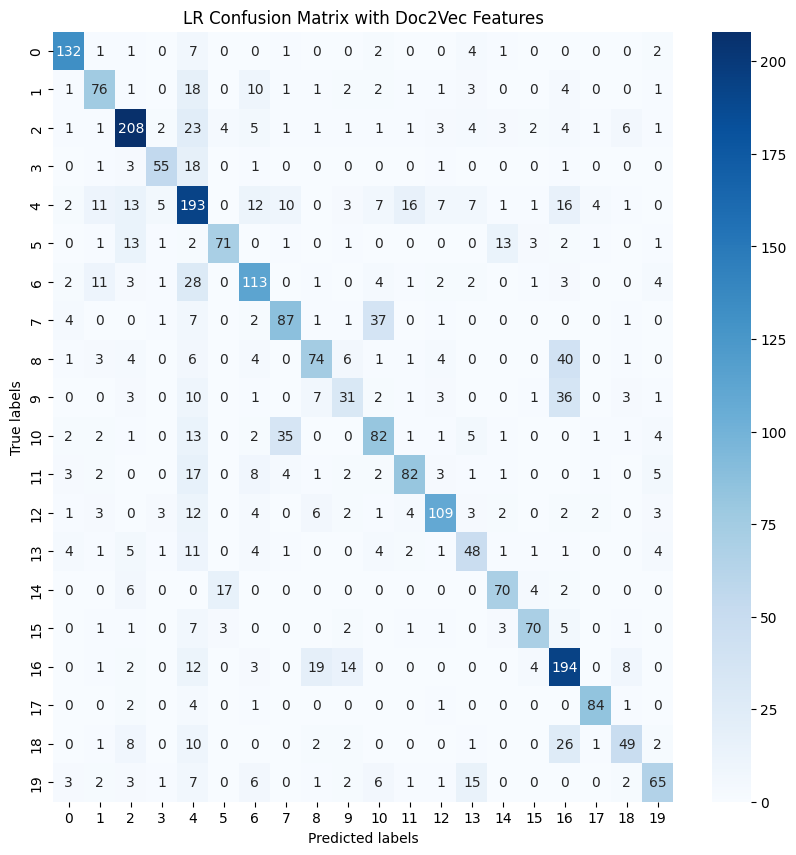

In [5]:
# Run logistic regression with doc2vec features
run_logistic_regression(X, y, 'LR Confusion Matrix with Doc2Vec Features', scale_features=True)

In [6]:
# Load the BERT feature matrix and labels
X = embeddings.get_bert()
y = embeddings.get_labels()

/home/pogrebitskiy.d/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............................................C=0.001; total time=   3.0s
[CV] END ............................................C=0.001; total time=   3.0s
[CV] END ............................................C=0.001; total time=   3.2s
[CV] END ............................................C=0.001; total time=   3.2s
[CV] END ............................................C=0.001; total time=   3.7s
[CV] END .............................................C=0.01; total time=   5.1s
[CV] END .............................................C=0.01; total time=   5.3s
[CV] END .............................................C=0.01; total time=   5.4s
[CV] END .............................................C=0.01; total time=   5.5s
[CV] END .............................................C=0.01; total time=   6.2s
[CV] END ..............................................C=0.1; total time=   9.4s
[CV] END ........................................

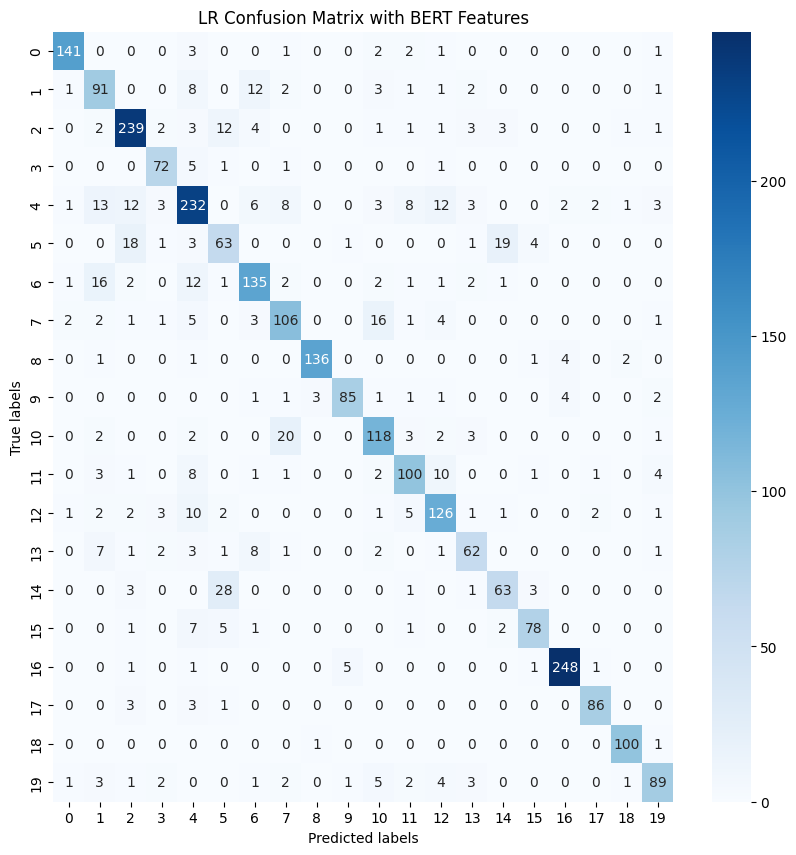

In [7]:
# Run logistic regression with BERT features, no need to scale features with BERT
run_logistic_regression(X, y, 'LR Confusion Matrix with BERT Features', scale_features=False)